In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [55]:
nickel_df = pd.read_excel("Nickel.xlsx", sheet_name="Data")
copper_df = pd.read_excel("Copper.xlsx", sheet_name="Data")
nickel_df = nickel_df.drop(columns="Unnamed: 0")
nickel_df = nickel_df.drop(labels=range(4))
nickel_df = nickel_df.rename(columns={"Unnamed: 1": "Year", "Unnamed: 2": "Price"})
nickel_df.loc[nickel_df["Year"] == "2019*", "Year"] = "2019"
nickel_df['Year'] = pd.to_datetime(nickel_df['Year'])
nickel_df.set_index('Year', inplace=True)

copper_df = copper_df.drop(columns="Unnamed: 0")
copper_df = copper_df.drop(labels=range(4))
copper_df = copper_df.rename(columns={"Unnamed: 1": "Year", "Unnamed: 2": "Price"})
copper_df.loc[copper_df["Year"] == "2019*", "Year"] = "2019"
copper_df['Year'] = pd.to_datetime(copper_df['Year'])
copper_df.set_index('Year', inplace=True)

In [56]:
nickel_df.head()

,Price
Year,
2006-01-01,1570.0
2007-01-01,1650.0
2008-01-01,1580.0
2009-01-01,1410.0
2010-01-01,1620.0


In [57]:
copper_df.head()

,Price
Year,
2006-01-01,15100.0
2007-01-01,15500.0
2008-01-01,15600.0
2009-01-01,15900.0
2010-01-01,16000.0


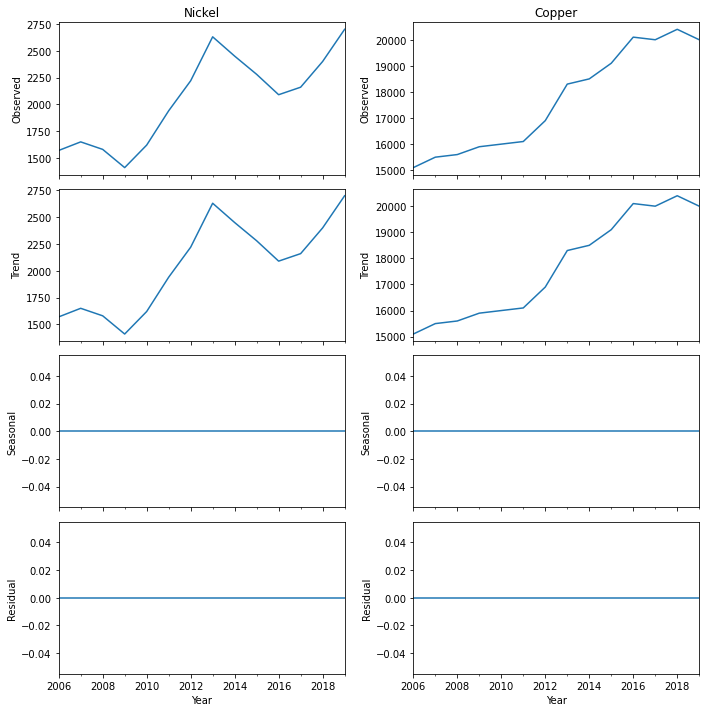

In [64]:
nickel = seasonal_decompose(nickel_df["Price"], model="additive", extrapolate_trend="freq")
copper = seasonal_decompose(copper_df["Price"], model="additive", extrapolate_trend="freq")

def plot_decomposed(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

plt.rcParams.update({'figure.figsize': (10,10)})
fig, axes = plt.subplots(4, 2, sharex=True)
plot_decomposed(nickel, axes[:,0])
axes[0, 0].set_title("Nickel")
axes[0, 1].set_title("Copper")
plot_decomposed(copper, axes[:,1])
plt.tight_layout()
plt.show()